# Classification model training for the vanGalen scRNA-seq data

Andrew Ashford, Pathways + Omics Group - OHSU, 6/6/2024

The purpose of this Jupyter Notebook file will be to load in the integrated vanGalen scRNA-seq data and use the mutation calls to train classification models. These will be trained to determine the presence or absence of several cancer-associated gene mutations associated with acute myeloid leukemia.


In [8]:
# Import modules
import scanpy as sc


#### Specify directory and file locations

In [13]:
# Specify the location of the integrated data
integrated_data_dir = '/Users/hamiltsy/Documents/GitLab/Mutation/integrated_data/'
integrated_data_filename = 'Scanorama-integrated_Beat_AML_K22_AML_adata.h5ad'

#integrated_data_dir = '/home/groups/precepts/ashforda/scOPE_github_stuff/data/testing/vanGalen_all_h5ad/'
#integrated_data_filename = 'Scanorama-integrated_Beat_AML_vanGalen_AML_adata.h5ad'


#### Read in the data

In [14]:
# Read in the h5ad file to an AnnData object using ScanPy module
vangalen_scrna_adata = sc.read_h5ad(integrated_data_dir + integrated_data_filename)


NameError: name 'adata' is not defined

AnnData object with n_obs × n_vars = 9194 × 100
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'batch'
    var: 'mean', 'std'
    uns: 'batch_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'


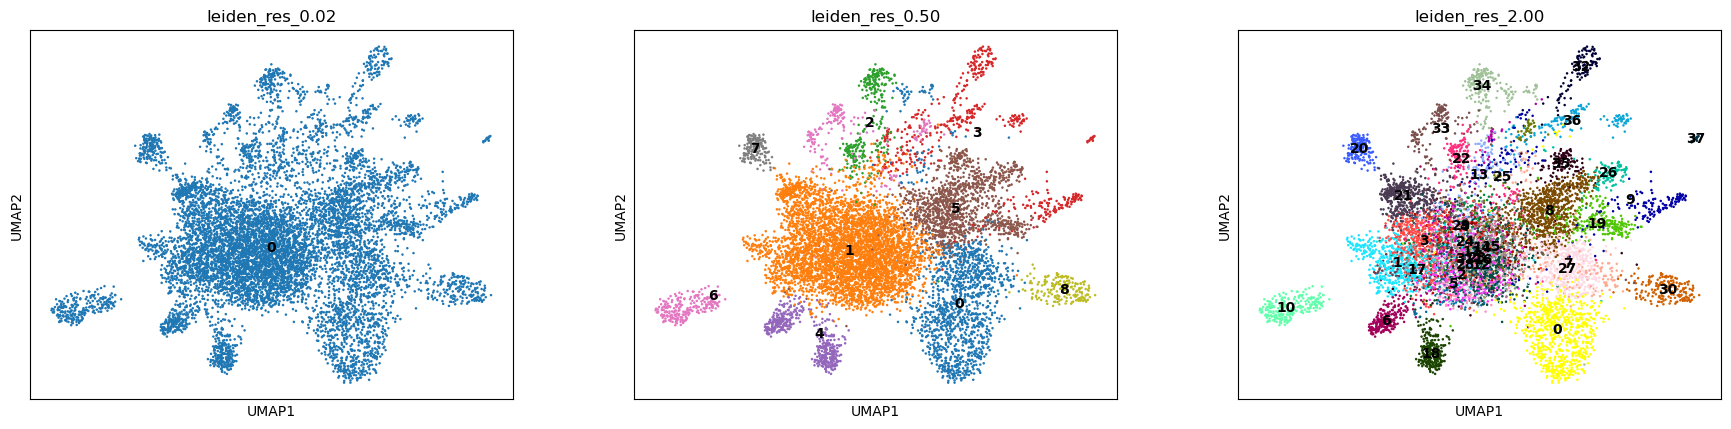

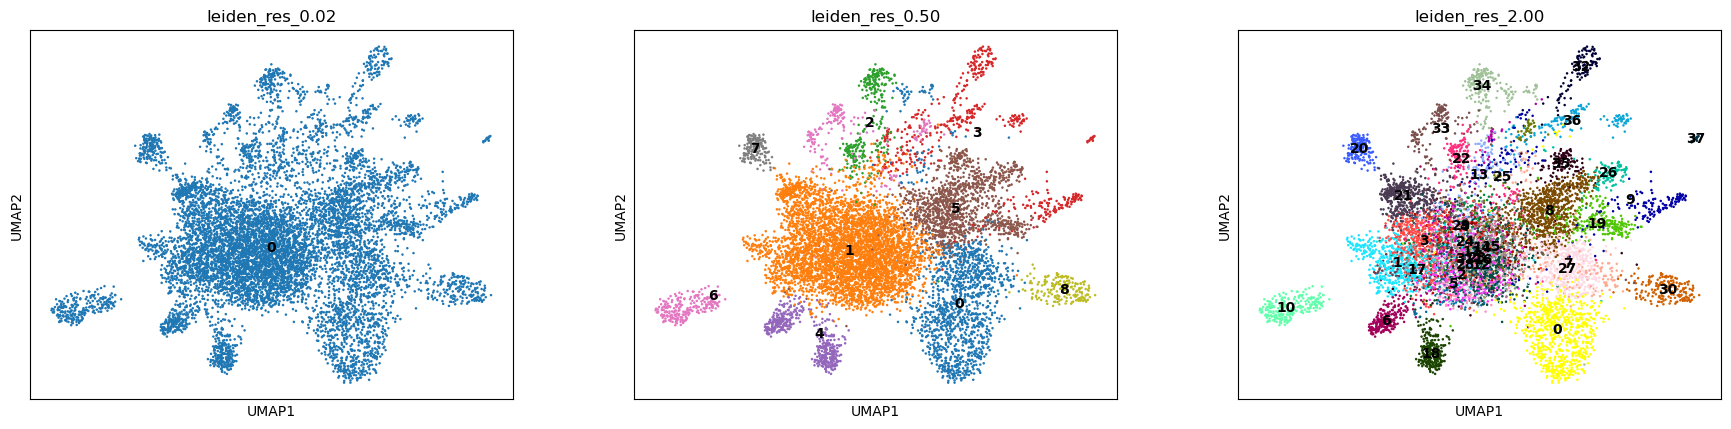

KeyError: "Could not find keys '['BCL11A', 'BLK', 'CCL5', 'CCR7', 'CD14', 'CD247', 'CD4', 'CD8A', 'CD8B', 'CDK6', 'CLEC10A', 'COBLL1', 'COL4A4', 'COTL1', 'CST3', 'DMXL2', 'FCER1A', 'FCER1G', 'FCGR3A', 'FCN1', 'FCRL1', 'FNDC3B', 'GNLY', 'GYPA', 'GZMA', 'GZMB', 'GZMH', 'GZMK', 'HBA1', 'HBB', 'HBM', 'HSP90B1', 'ID2', 'IGHD', 'IGHM', 'IGKC', 'IL3RA', 'IL4R', 'IL7R', 'IRF4', 'ITGB1', 'JCHAIN', 'KLRG1', 'LEF1', 'LYN', 'LYZ', 'MKI67', 'MS4A1', 'MZB1', 'NKG7', 'PAX5', 'PLCG2', 'PRDM1', 'SYNE1', 'SYNGR1', 'TCF4', 'TCF7', 'TCF7L2', 'TRBC2', 'TYROBP', 'XBP1']' in columns of `adata.obs` or in adata.var_names."

In [21]:
# Sanity check - make sure loaded in properly
print(vangalen_scrna_adata)

for res in [0.02, 0.5, 2.0]:
    sc.tl.leiden(
        vangalen_scrna_adata, key_added=f"leiden_res_{res:4.2f}", resolution=res, flavor="igraph"
    )

sc.pl.umap(
    vangalen_scrna_adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

sc.pl.umap(
    vangalen_scrna_adata,
    color=["leiden_res_0.02", "leiden_res_0.50", "leiden_res_2.00"],
    legend_loc="on data",
)

marker_genes = {
    "CD14+ Mono": ["FCN1", "CD14"],
    "CD16+ Mono": ["TCF7L2", "FCGR3A", "LYN"],
    # Note: DMXL2 should be negative
    "cDC2": ["CST3", "COTL1", "LYZ", "DMXL2", "CLEC10A", "FCER1A"],
    "Erythroblast": ["MKI67", "HBA1", "HBB"],
    # Note HBM and GYPA are negative markers
    "Proerythroblast": ["CDK6", "SYNGR1", "HBM", "GYPA"],
    "NK": ["GNLY", "NKG7", "CD247", "FCER1G", "TYROBP", "KLRG1", "FCGR3A"],
    "ILC": ["ID2", "PLCG2", "GNLY", "SYNE1"],
    "Naive CD20+ B": ["MS4A1", "IL4R", "IGHD", "FCRL1", "IGHM"],
    # Note IGHD and IGHM are negative markers
    "B cells": [
        "MS4A1",
        "ITGB1",
        "COL4A4",
        "PRDM1",
        "IRF4",
        "PAX5",
        "BCL11A",
        "BLK",
        "IGHD",
        "IGHM",
    ],
    "Plasma cells": ["MZB1", "HSP90B1", "FNDC3B", "PRDM1", "IGKC", "JCHAIN"],
    # Note PAX5 is a negative marker
    "Plasmablast": ["XBP1", "PRDM1", "PAX5"],
    "CD4+ T": ["CD4", "IL7R", "TRBC2"],
    "CD8+ T": ["CD8A", "CD8B", "GZMK", "GZMA", "CCL5", "GZMB", "GZMH", "GZMA"],
    "T naive": ["LEF1", "CCR7", "TCF7"],
    "pDC": ["GZMB", "IL3RA", "COBLL1", "TCF4"],
}

sc.pl.dotplot(vangalen_scrna_adata, marker_genes, groupby="leiden_res_0.02", standard_scale="var")


#### Visualize data - counts UMAPs versus PC UMAPs

In [16]:
# UMAP visualization of integrated data as a check
sc.pp.neighbors(vangalen_scrna_adata, use_rep='X')
sc.tl.umap(vangalen_scrna_adata)


KeyError: 'Could not find key leiden in .var_names or .obs.columns.'

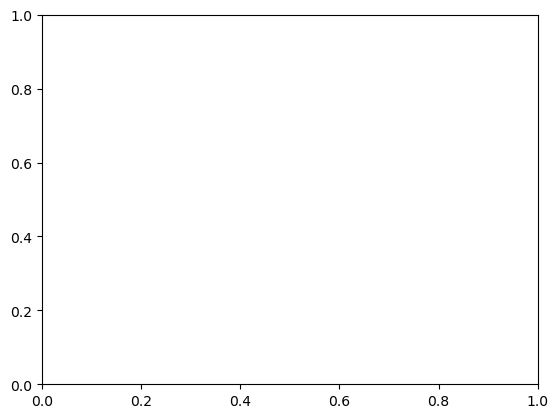

In [17]:
# See UMAP made in previous step
sc.pl.umap(vangalen_scrna_adata, color=['leiden'])


In [7]:
# See UMAP made in previous step
sc.pl.umap(vangalen_scrna_adata, color=['orig.ident'])


KeyError: "Could not find 'umap' or 'X_umap' in .obsm"

In [8]:
# UMAP visualization of integrated data as a check
sc.pp.neighbors(vangalen_scrna_adata, use_rep='X_pca')
sc.tl.umap(vangalen_scrna_adata)


ValueError: Did not find X_pca in `.obsm.keys()`. You need to compute it first.

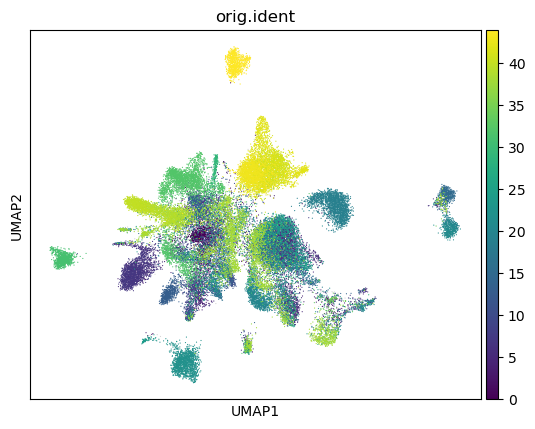

In [135]:
# See UMAP made in previous step
sc.pl.umap(vangalen_scrna_adata, color=['orig.ident'])


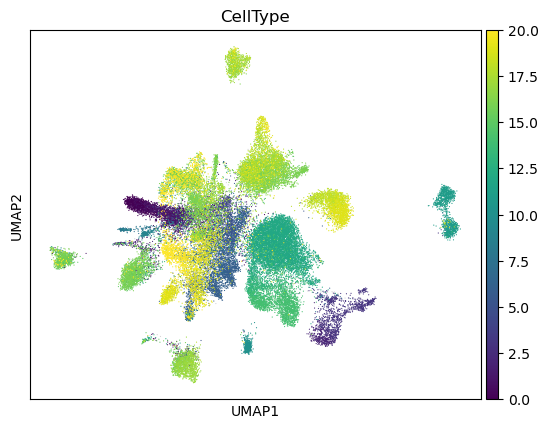

In [136]:
# See UMAP made in previous step
sc.pl.umap(vangalen_scrna_adata, color=['CellType'])


In [137]:
'''
# Step 1: Run Clustering with igraph Backend
sc.pp.neighbors(vangalen_scrna_adata, n_neighbors=10, n_pcs=40)
sc.tl.leiden(vangalen_scrna_adata, flavor='igraph', directed=False)

# Step 2: Ensure Data is Logarithmized and Perform Differential Expression Analysis
sc.tl.rank_genes_groups(vangalen_scrna_adata, groupby='leiden', method='t-test', use_raw=True)

# Step 3: Plot the Heatmap
sc.pl.rank_genes_groups_heatmap(
    vangalen_scrna_adata,
    n_genes=10,
    use_raw=False,
    swap_axes=True,
    show_gene_labels=False,
    vmin=-3,
    vmax=3,
    cmap="bwr",
)
'''

'\n# Step 1: Run Clustering with igraph Backend\nsc.pp.neighbors(vangalen_scrna_adata, n_neighbors=10, n_pcs=40)\nsc.tl.leiden(vangalen_scrna_adata, flavor=\'igraph\', directed=False)\n\n# Step 2: Ensure Data is Logarithmized and Perform Differential Expression Analysis\nsc.tl.rank_genes_groups(vangalen_scrna_adata, groupby=\'leiden\', method=\'t-test\', use_raw=True)\n\n# Step 3: Plot the Heatmap\nsc.pl.rank_genes_groups_heatmap(\n    vangalen_scrna_adata,\n    n_genes=10,\n    use_raw=False,\n    swap_axes=True,\n    show_gene_labels=False,\n    vmin=-3,\n    vmax=3,\n    cmap="bwr",\n)\n'

In [138]:
# Subset an AnnData object with just those samples who have mutation calls
vangalen_scrna_muts = vangalen_scrna_adata[vangalen_scrna_adata.obs['MutTranscripts'] != 'NA']
vangalen_scrna_muts = vangalen_scrna_muts[vangalen_scrna_muts.obs['MutTranscripts'] != '']


In [139]:
# Sanity check
print(vangalen_scrna_muts.obs['MutTranscripts'])
print(set(vangalen_scrna_muts.obs['MutTranscripts']))


AML1012.D0_TTTCGTTTAAAT-scRNA       NRAS.G13D/7472
AML1012.D0_CCTTTTCGCATC-scRNA      NRAS.G13D/14837
AML1012.D0_AGCAAATCATTN-scRNA       KRAS.G13D/4105
AML1012.D0_CATTCACCGCCA-scRNA    SF3A1.G478S/70508
AML1012.D0_CACGTCCCGACN-scRNA       NRAS.G13D/1555
                                       ...        
BA3385R-bulk                                   NaN
BA3242R-bulk                                   NaN
BA3446R-bulk                                   NaN
BA3416R-bulk                                   NaN
BA3123R-bulk                                   NaN
Name: MutTranscripts, Length: 1543, dtype: category
Categories (734, object): ['ATM.G2023R/13', 'ATM.G2023R/14', 'ATM.G2023R/16', 'ATM.G2023R/17', ..., 'TP53.Q144P/244', 'TP53.Q144P/354', 'TP53.R273L/8200', 'TP53.R273L/16527']
{'NPM1.W288fs/61', 'NPM1.W288fs/6975', 'NPM1.W288fs/1119 /// NPM1.W288fs/310', 'NPM1.W288fs/48', 'NPM1.W288fs/3958', 'NPM1.W288fs/252', 'NPM1.W288fs/2279 /// NPM1.W288fs/31', 'NPM1.W288fs/99', 'NPM1.W288fs/3821',

In [140]:
# Can get counts of specific mutations by seeing is a substring is within the mutations
'''
Mutations from the bulk AML data:
['TET2', 'NPM1', 'WT1', 'DNMT3A', 'SRSF2', 'KRAS', 'IDH2', 'BCOR', 'FLT3', 'CEBPA', 'SF3B1', 'RUNX1', 
 'IDH1', 'PHF6', 'NF1', 'JAK2', 'NRAS', 'CCND3', 'RAD21', 'ASXL1', 'CREBBP', 'BCORL1', 'EZH2', 'STAG2', 
 'PTPN11', 'U2AF1', 'TP53', 'GATA2', 'ZRSR2', 'KIT', 'PDS5B', 'SMC1A', 'CBL', 'SMC3']
'''

# Define the specific string to search for
search_string = 'DNMT3A'

# Filter categories containing the specific string
specific_mut = vangalen_scrna_muts.obs['MutTranscripts'][vangalen_scrna_muts.obs['MutTranscripts'].str.contains(search_string)]

print(len(specific_mut))

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [90]:
# Iterate through the mutations to plot for each gene of interest
mutation_counts_dict = {'TET2': 0, 'NPM1': 0, 'WT1': 0, 'DNMT3A': 0, 'SRSF2': 0, 'KRAS': 0, 'IDH2': 0, 
                        'BCOR': 0, 'FLT3': 0, 'CEBPA': 0, 'SF3B1': 0, 'RUNX1': 0, 'IDH1': 0, 'PHF6': 0, 
                        'NF1': 0, 'JAK2': 0, 'NRAS': 0, 'CCND3': 0, 'RAD21': 0, 'ASXL1': 0, 'CREBBP': 0,
                        'BCORL1': 0, 'EZH2': 0, 'STAG2': 0, 'PTPN11': 0, 'U2AF1': 0, 'TP53': 0,
                        'GATA2': 0, 'ZRSR2': 0, 'KIT': 0, 'PDS5B': 0, 'SMC1A': 0, 'CBL': 0, 'SMC3': 0}


In [93]:
for key in mutation_counts_dict.keys():
    #print(key)
    # Filter categories containing the specific string
    specific_mut = vangalen_scrna_muts.obs['MutTranscripts'][vangalen_scrna_muts.obs['MutTranscripts'].str.contains(key)]
    #print(len(specific_mut))
    mutation_counts_dict[key] = len(specific_mut)


TET2
18
NPM1
555
WT1
0
DNMT3A
151
SRSF2
0
KRAS
2
IDH2
3
BCOR
2
FLT3
46
CEBPA
0
SF3B1
0
RUNX1
23
IDH1
0
PHF6
0
NF1
0
JAK2
0
NRAS
36
CCND3
0
RAD21
9
ASXL1
0
CREBBP
0
BCORL1
0
EZH2
0
STAG2
0
PTPN11
1
U2AF1
0
TP53
52
GATA2
0
ZRSR2
0
KIT
24
PDS5B
0
SMC1A
0
CBL
0
SMC3
7


In [94]:
print(mutation_counts_dict)


{'TET2': 18, 'NPM1': 555, 'WT1': 0, 'DNMT3A': 151, 'SRSF2': 0, 'KRAS': 2, 'IDH2': 3, 'BCOR': 2, 'FLT3': 46, 'CEBPA': 0, 'SF3B1': 0, 'RUNX1': 23, 'IDH1': 0, 'PHF6': 0, 'NF1': 0, 'JAK2': 0, 'NRAS': 36, 'CCND3': 0, 'RAD21': 9, 'ASXL1': 0, 'CREBBP': 0, 'BCORL1': 0, 'EZH2': 0, 'STAG2': 0, 'PTPN11': 1, 'U2AF1': 0, 'TP53': 52, 'GATA2': 0, 'ZRSR2': 0, 'KIT': 24, 'PDS5B': 0, 'SMC1A': 0, 'CBL': 0, 'SMC3': 7}


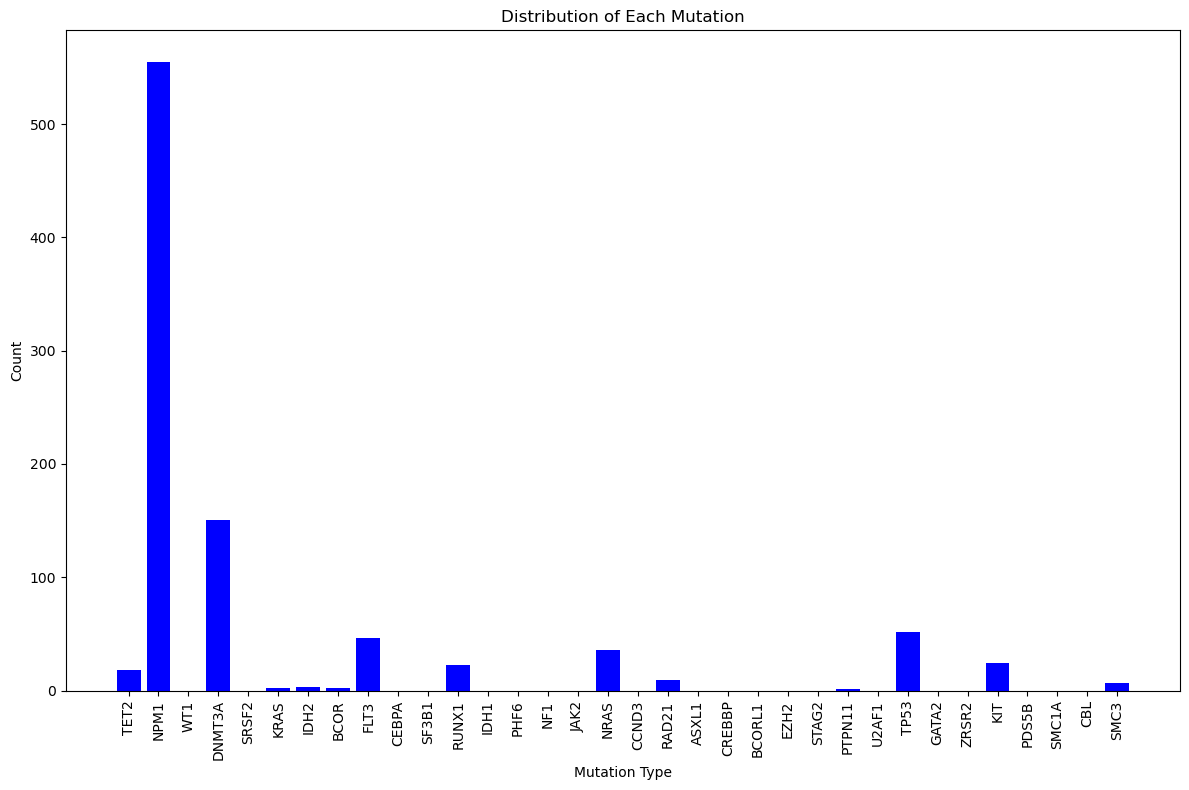

In [95]:
import matplotlib.pyplot as plt

# Extracting keys and values from the dictionary
mutations = list(mutation_counts_dict.keys())
counts = list(mutation_counts_dict.values())

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(mutations, counts, color='blue')
plt.xlabel('Mutation Type')
plt.ylabel('Count')
plt.title('Distribution of Each Mutation')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


In [101]:
# Iterate through the mutations to plot for each gene of interest
wt_counts_dict = {'TET2': 0, 'NPM1': 0, 'WT1': 0, 'DNMT3A': 0, 'SRSF2': 0, 'KRAS': 0, 'IDH2': 0, 
                  'BCOR': 0, 'FLT3': 0, 'CEBPA': 0, 'SF3B1': 0, 'RUNX1': 0, 'IDH1': 0, 'PHF6': 0, 
                  'NF1': 0, 'JAK2': 0, 'NRAS': 0, 'CCND3': 0, 'RAD21': 0, 'ASXL1': 0, 'CREBBP': 0, 
                  'BCORL1': 0, 'EZH2': 0, 'STAG2': 0, 'PTPN11': 0, 'U2AF1': 0, 'TP53': 0,
                  'GATA2': 0, 'ZRSR2': 0, 'KIT': 0, 'PDS5B': 0, 'SMC1A': 0, 'CBL': 0, 'SMC3': 0}


for key in wt_counts_dict.keys():
    #print(key)
    # Filter categories containing the specific string
    specific_wt = vangalen_scrna_wt.obs['WtTranscripts'][vangalen_scrna_wt.obs['WtTranscripts'].str.contains(key)]
    #print(len(specific_mut))
    wt_counts_dict[key] = len(specific_wt)



In [102]:
print(wt_counts_dict)


{'TET2': 32, 'NPM1': 1643, 'WT1': 0, 'DNMT3A': 426, 'SRSF2': 0, 'KRAS': 41, 'IDH2': 237, 'BCOR': 0, 'FLT3': 136, 'CEBPA': 0, 'SF3B1': 0, 'RUNX1': 25, 'IDH1': 0, 'PHF6': 0, 'NF1': 0, 'JAK2': 0, 'NRAS': 117, 'CCND3': 0, 'RAD21': 193, 'ASXL1': 0, 'CREBBP': 0, 'BCORL1': 0, 'EZH2': 0, 'STAG2': 0, 'PTPN11': 1, 'U2AF1': 0, 'TP53': 26, 'GATA2': 0, 'ZRSR2': 0, 'KIT': 40, 'PDS5B': 0, 'SMC1A': 0, 'CBL': 0, 'SMC3': 19}


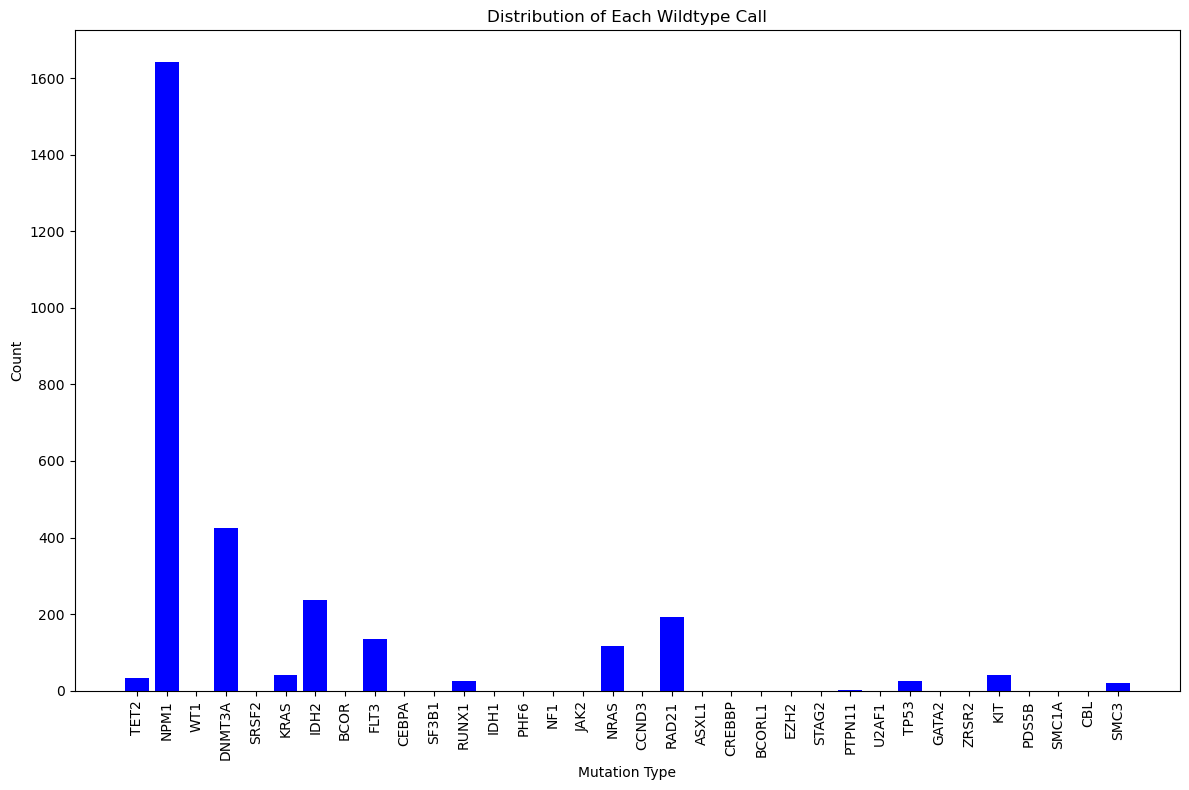

In [103]:
# Extracting keys and values from the dictionary
wts = list(wt_counts_dict.keys())
counts = list(wt_counts_dict.values())

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(wts, counts, color='blue')
plt.xlabel('Mutation Type')
plt.ylabel('Count')
plt.title('Distribution of Each Wildtype Call')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


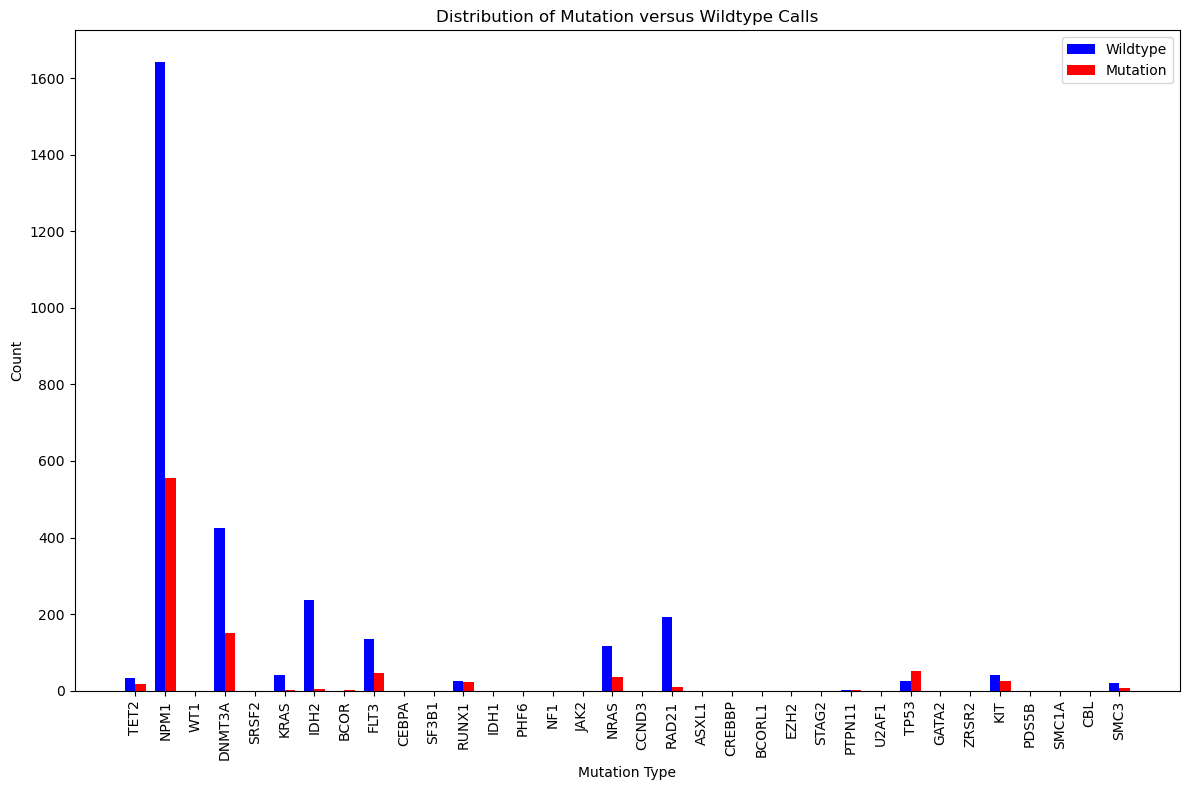

In [104]:
import matplotlib.pyplot as plt
import numpy as np


# Create index for bar positions
x = np.arange(len(wts))

# Bar width
width = 0.35

# Create the bar plot
plt.figure(figsize=(12, 8))
plt.bar(x - width/2, wt_counts_dict.values(), width, label='Wildtype', color='blue')
plt.bar(x + width/2, mutation_counts_dict.values(), width, label='Mutation', color='red')

# Add labels and title
plt.xlabel('Mutation Type')
plt.ylabel('Count')
plt.title('Distribution of Mutation versus Wildtype Calls')
plt.xticks(x, wts, rotation=90)  # Set x-tick labels and rotate for better readability
plt.legend()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


#### Specify functions to help with model training

#### Train the model

In [112]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Load your AnnData object (assuming it's already loaded)
# vangalen_scrna_adata

# Clean the MutTranscripts and WtTranscripts columns
mut_transcripts = vangalen_scrna_adata.obs[vangalen_scrna_adata.obs['MutTranscripts'] != 'NA']
wt_transcripts = vangalen_scrna_adata.obs[vangalen_scrna_adata.obs['WtTranscripts'] != 'NA']

# Filter out empty strings
mut_transcripts = mut_transcripts[mut_transcripts != '']
wt_transcripts = wt_transcripts[wt_transcripts != '']



In [114]:
# Extract unique genes from the mutation data
unique_genes = set(gene.split('.')[0] for gene in mut_transcripts.unique())

print(unique_genes)

# Initialize a DataFrame to hold binary labels for each gene
mut_data_agg = pd.DataFrame(0, index=vangalen_scrna_adata.obs_names, columns=unique_genes)

# Fill the DataFrame with binary labels for mutations
for index, row in mut_transcripts.iteritems():
    genes = row.split(' /// ')
    for gene in genes:
        gene_name = gene.split('.')[0]
        if gene_name in unique_genes:
            mut_data_agg.at[index, gene_name] = 1

# Include wildtype data (ensure wildtype entries are properly added)
for index, row in wt_transcripts.iteritems():
    genes = row.split(' /// ')
    for gene in genes:
        gene_name = gene.split('.')[0]
        if gene_name in unique_genes and mut_data_agg.at[index, gene_name] == 0:
            mut_data_agg.at[index, gene_name] = 0

# Standardize the PCA features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(vangalen_scrna_adata.obsm['X_pca'])

# Initialize models
ridge_model = RidgeClassifier()
rf_model = RandomForestClassifier()
svm_model = SVC(probability=True)

# Set constants
MIN_POSITIVE_SAMPLES = 5
DEFAULT_CV_SPLITS = 5

# Function to train and evaluate models
def train_evaluate_model(X, y, model, model_name, cv_splits, gene, roc_auc_dict):
    scores = cross_val_score(model, X, y, cv=cv_splits, scoring='roc_auc')
    roc_auc_dict[gene][model_name].extend(scores)
    print(f"{model_name} AUC for {gene}: {np.mean(scores)}")

# Initialize dictionary to store ROC AUC scores
roc_auc_dict = {}
valid_mutations = []

# Train and evaluate models
for mutation in mut_data_agg.columns:
    y_mutation = mut_data_agg[mutation].astype(int)
    
    # Check the distribution of the labels
    positive_samples = np.sum(y_mutation)
    negative_samples = len(y_mutation) - positive_samples
    
    if positive_samples < MIN_POSITIVE_SAMPLES:
        continue
    
    # Dynamically set the number of CV splits
    cv_splits = min(DEFAULT_CV_SPLITS, positive_samples, negative_samples)
    
    if cv_splits < 2:
        continue
        
    if mutation not in roc_auc_dict:
        roc_auc_dict[mutation] = {'Ridge Classifier': [], 'Random Forest Classifier': [], 'SVM Classifier': []}
    
    print(f"Training models for mutation: {mutation}")
    
    # Sample equal number of negative samples
    positive_indices = np.where(y_mutation == 1)[0]
    negative_indices = np.where(y_mutation == 0)[0]
    
    negative_indices_sampled = resample(negative_indices, replace=False, n_samples=positive_samples, random_state=42)
    
    # Combine positive and negative samples
    combined_indices = np.concatenate([positive_indices, negative_indices_sampled])
    X_pca_scaled_sampled = X_scaled[combined_indices]
    y_mutation_sampled = y_mutation.iloc[combined_indices]
    
    train_evaluate_model(X_pca_scaled_sampled, y_mutation_sampled, ridge_model, "Ridge Classifier", cv_splits, mutation, roc_auc_dict)
    train_evaluate_model(X_pca_scaled_sampled, y_mutation_sampled, rf_model, "Random Forest Classifier", cv_splits, mutation, roc_auc_dict)
    train_evaluate_model(X_pca_scaled_sampled, y_mutation_sampled, svm_model, "SVM Classifier", cv_splits, mutation, roc_auc_dict)
    
    valid_mutations.append(mutation)

print("Training completed.")
                


AttributeError: 'DataFrame' object has no attribute 'unique'